<a href="https://colab.research.google.com/github/rhiats/stockReturn/blob/main/StockReturn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Historical Stock Prices of Morgan Stanley**

References:

https://finance.yahoo.com/quote/MS/history?p=MS

https://www.ferventlearning.com/how-to-calculate-stock-returns/
https://www.ferventlearning.com/finance-data-science-projects/#Project_B-1_Calculate_Stock_Returns

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import mahalanobis

**Historical Stock Return**

        Date  return_Stock
186  7/18/23     -6.058298
         Date  return_Stock
251  10/18/23      8.730381
Average Annual Return 0.04214163834872108


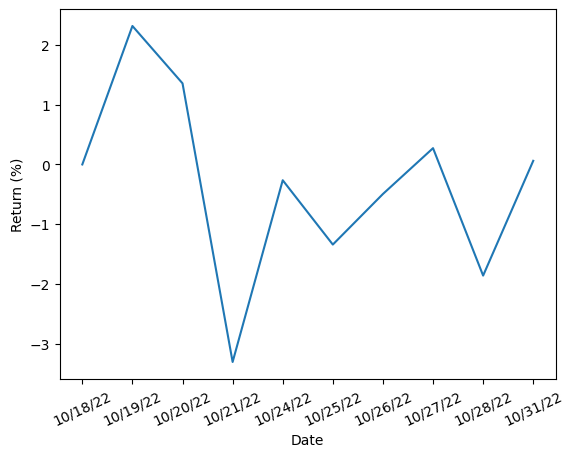

In [22]:
df=pd.read_csv("/content/drive/MyDrive/ms.csv")

df['Close_1'] = df['Close'].shift(1,fill_value=79.440002)
df['return_Stock']=((df['Close_1']/df['Close']) - 1)*100

df_10=df.head(10)
sns.lineplot(data=df_10, x="Date", y="return_Stock")
plt.xticks(rotation = 25)
plt.ylabel('Return (%)')

print(df[df['return_Stock']==df['return_Stock'].min()][['Date','return_Stock']])

print(df[df['return_Stock']==df['return_Stock'].max()][['Date','return_Stock']])

print("Average Annual Return",df['return_Stock'].mean())

**Outlier Detection using Mahalanobis Distance**

https://medium.com/@the_daft_introvert/mahalanobis-distance-5c11a757b099

https://towardsdatascience.com/unsupervised-learning-for-anomaly-detection-44c55a96b8c1

In [17]:
X=df['Close']
mu = np.mean(X)
sigma = np.var(X)

df = df.assign(Center_Mean=lambda x: (x['Close']-mu))
md_arr=np.sqrt(np.transpose(df['Center_Mean'].array)*(1/sigma)*(df['Center_Mean'].array))
df['Mahalanobis Distance']=md_arr

**Decile Mahalanobis Distance**

In [19]:
df['Decile_rank_Dist'] = pd.qcut(df['Mahalanobis Distance'], 10, labels = False)

In [21]:
df[df['Decile_rank_Dist']==9]
#February 2023
#October 2022 and October 2023 - start of Q4

,Date,Open,High,Low,Close,Adj Close,Volume,Close_1,return_Stock,Center_Mean,Mahalanobis Distance,Decile_rank_Dist
1,10/19/22,79.150002,79.589996,77.370003,77.639999,74.931038,7429600,79.440002,2.318396,-9.982104,1.856297,9
2,10/20/22,77.629997,78.540001,76.139999,76.599998,73.927330,7638100,77.639999,1.357704,-11.022105,2.049698,9
71,1/31/23,96.290001,97.370003,95.760002,97.330002,95.609985,7182100,95.959999,-1.407586,9.707899,1.805305,9
72,2/1/23,96.949997,99.059998,96.930000,98.190002,96.454788,9815200,97.330002,-0.875853,10.567899,1.965233,9
73,2/2/23,98.879997,100.269997,97.959999,99.209999,97.456764,11118900,98.190002,-1.028119,11.587896,2.154914,9
74,2/3/23,98.239998,100.180000,98.070000,99.430000,97.672874,6948600,99.209999,-0.221262,11.807897,2.195826,9
75,2/6/23,98.449997,99.199997,98.070000,98.900002,97.152245,4737700,99.430000,0.535893,11.277899,2.097266,9
76,2/7/23,98.769997,99.820000,98.050003,99.220001,97.466591,5060700,98.900002,-0.322515,11.597898,2.156774,9
77,2/8/23,98.320000,99.940002,98.059998,98.959999,97.211174,4705200,99.220001,0.262734,11.337896,2.108423,9
78,2/9/23,99.220001,99.800003,97.730003,98.050003,96.317261,4983800,98.959999,0.928094,10.427900,1.939198,9
